In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

workding dir: /Users/inflaton/code/engd/papers/maritime/global-incidents
loading env vars from: /Users/inflaton/code/engd/papers/maritime/global-incidents/.env


True

## Import Statement

In [2]:
import pandas as pd

### read the data

In [3]:
result_df = pd.read_csv("data/processed_data.csv")

In [5]:
result_df.head()

Details  \
0  Media sources indicate that workers at the Gra...   
1  News sources are stating that recent typhoons ...   
2  The persisting port congestion at Shanghai’s Y...   
3  Updated local media sources from Jakarta indic...   
4  According to local police in Jakarta, two expl...   

                     Category  \
0         Mine Workers Strike   
1              Travel Warning   
2             Port Congestion   
3  Bombing, Police Operations   
4  Bombing, Police Operations   

                                     Details_cleaned  \
0  medium source indicate worker grasberg mine ex...   
1  news source stating recent typhoon impact hong...   
2  persisting port congestion shanghai ’ yangshan...   
3  updated local medium source jakarta indicate e...   
4  according local police jakarta two explosion c...   

             Category_cleaned      Category_single      Summarized_label  
0         Mine Workers Strike  Mine Workers Strike         Worker Strike  
1              Travel Warning       Travel Warning  Administrative Issue  
2             Port Congestion      Port Congestion  Administrative Issue  
3  Bombing, Police Operations              Bombing             Terrorism  
4  Bombing, Police Operations              Bombing             Terrorism

## Naive Bayes Model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [7]:
X = result_df["Details_cleaned"]
y = result_df["Summarized_label"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# vectorizer = CountVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [10]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [11]:
predictions = naive_bayes.predict(X_test_tfidf)

In [12]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Naive Bayes model:", accuracy)
print(classification_report(y_test, predictions))

Accuracy of Naive Bayes model: 0.763840830449827
                      precision    recall  f1-score   support

            Accident       0.71      0.74      0.72       129
Administrative Issue       0.83      0.89      0.86       662
        Cyber Attack       0.00      0.00      0.00         4
         Human Error       0.00      0.00      0.00        18
              Others       0.41      0.24      0.30        79
           Terrorism       0.42      0.15      0.23        52
             Weather       0.77      0.92      0.84        92
       Worker Strike       0.61      0.69      0.65       120

            accuracy                           0.76      1156
           macro avg       0.47      0.46      0.45      1156
        weighted avg       0.73      0.76      0.74      1156



/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Find the optimal Alpha parameter

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0]}

# Initialize the grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring="accuracy")

# Perform the grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_["alpha"]
print("Best Alpha:", best_alpha)

# Train the model with the best alpha
naive_bayes_tuned = MultinomialNB(alpha=best_alpha)
naive_bayes_tuned.fit(X_train_tfidf, y_train)

Best Alpha: 0.1


MultinomialNB(alpha=0.1)

Change the Alpha to 0.1 and max_features to 4000 for better performance

In [14]:
import time

In [15]:
X = result_df["Details_cleaned"]
y = result_df["Summarized_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

naive_bayes = MultinomialNB(alpha=0.1)
naive_bayes.fit(X_train_tfidf, y_train)

predictions = naive_bayes.predict(X_test_tfidf)

end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Naive Bayes model:", accuracy)
print(classification_report(y_test, predictions))

print("Total Runtime:", total_runtime)

Accuracy of Naive Bayes model: 0.7923875432525952
                      precision    recall  f1-score   support

            Accident       0.74      0.84      0.79       129
Administrative Issue       0.89      0.87      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.67      0.22      0.33        18
              Others       0.45      0.35      0.40        79
           Terrorism       0.54      0.40      0.46        52
             Weather       0.77      0.93      0.85        92
       Worker Strike       0.65      0.75      0.69       120

            accuracy                           0.79      1156
           macro avg       0.71      0.58      0.60      1156
        weighted avg       0.79      0.79      0.79      1156

Total Runtime: 0.11176609992980957


## Logistic Regression model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [19]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.7975778546712803
                      precision    recall  f1-score   support

            Accident       0.79      0.81      0.80       129
Administrative Issue       0.83      0.93      0.88       662
        Cyber Attack       0.00      0.00      0.00         4
         Human Error       0.00      0.00      0.00        18
              Others       0.64      0.34      0.45        79
           Terrorism       0.46      0.21      0.29        52
             Weather       0.83      0.87      0.85        92
       Worker Strike       0.69      0.71      0.70       120

            accuracy                           0.80      1156
           macro avg       0.53      0.48      0.50      1156
        weighted avg       0.77      0.80      0.78      1156



/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [21]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_grid = {
    "tfidf__max_features": [500, 1000, 2000, 3000, 4000],
    "model__C": [0.1, 1.0, 10.0],
}

pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("model", LogisticRegression())])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Tuned Logistic Regression Model:", accuracy)
print(classification_report(y_test, y_pred))

/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Best Parameters: {'model__C': 10.0, 'tfidf__max_features': 2000}
Accuracy of Tuned Logistic Regression Model: 0.8200692041522492
                      precision    recall  f1-score   support

            Accident       0.81      0.86      0.83       129
Administrative Issue       0.86      0.91      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.60      0.17      0.26        18
              Others       0.61      0.43      0.50        79
           Terrorism       0.61      0.44      0.51        52
             Weather       0.87      0.90      0.89        92
       Worker Strike       0.73      0.75      0.74       120

            accuracy                           0.82      1156
           macro avg       0.76      0.59      0.63      1156
        weighted avg       0.81      0.82      0.81      1156



The best parameters are 'model__C': 10.0, 'tfidf__max_features': 2000

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression(C=10.0)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)
print(classification_report(y_test, y_pred))

print("Total Runtime:", total_runtime)

Accuracy of Logistic Regression Model: 0.8200692041522492
                      precision    recall  f1-score   support

            Accident       0.81      0.86      0.83       129
Administrative Issue       0.86      0.91      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.60      0.17      0.26        18
              Others       0.61      0.43      0.50        79
           Terrorism       0.61      0.44      0.51        52
             Weather       0.87      0.90      0.89        92
       Worker Strike       0.73      0.75      0.74       120

            accuracy                           0.82      1156
           macro avg       0.76      0.59      0.63      1156
        weighted avg       0.81      0.82      0.81      1156

Total Runtime: 0.3430769443511963


## Support Vector Machine (SVM) model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [26]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [27]:
y_pred = svm_model.predict(X_test_tfidf)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of SVM model: 0.8183391003460208
                      precision    recall  f1-score   support

            Accident       0.78      0.82      0.80       129
Administrative Issue       0.87      0.92      0.89       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.67      0.11      0.19        18
              Others       0.62      0.42      0.50        79
           Terrorism       0.55      0.31      0.40        52
             Weather       0.82      0.90      0.86        92
       Worker Strike       0.72      0.80      0.76       120

            accuracy                           0.82      1156
           macro avg       0.75      0.57      0.60      1156
        weighted avg       0.81      0.82      0.80      1156



In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 1, 10]}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_tfidf, y_train)
best_c = grid_search.best_params_["C"]
print("Best C:", best_c)

Best C: 10


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_model = SVC(kernel="linear", C=10)
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of SVM model: 0.782871972318339
                      precision    recall  f1-score   support

            Accident       0.72      0.84      0.77       129
Administrative Issue       0.86      0.86      0.86       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.62      0.28      0.38        18
              Others       0.51      0.46      0.48        79
           Terrorism       0.49      0.38      0.43        52
             Weather       0.81      0.87      0.84        92
       Worker Strike       0.69      0.69      0.69       120

            accuracy                           0.78      1156
           macro avg       0.71      0.58      0.61      1156
        weighted avg       0.78      0.78      0.78      1156



But when C is set to 10, the accuracy drops, it may be due to overfitting. We will still use the defaul value C=1.0

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_model = SVC(kernel="linear")
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)
print(classification_report(y_test, y_pred))

print("Total Runtime:", total_runtime)

Accuracy of SVM model: 0.8217993079584776
                      precision    recall  f1-score   support

            Accident       0.82      0.86      0.84       129
Administrative Issue       0.86      0.93      0.89       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.00      0.00      0.00        18
              Others       0.64      0.41      0.50        79
           Terrorism       0.61      0.33      0.42        52
             Weather       0.83      0.90      0.86        92
       Worker Strike       0.71      0.77      0.74       120

            accuracy                           0.82      1156
           macro avg       0.68      0.55      0.58      1156
        weighted avg       0.80      0.82      0.81      1156

Total Runtime: 3.328857660293579


## Random Forest Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = rf_model.predict(X_test_tfidf)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Model: 0.801038062283737
                      precision    recall  f1-score   support

            Accident       0.77      0.80      0.79       129
Administrative Issue       0.84      0.92      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.50      0.06      0.10        18
              Others       0.72      0.39      0.51        79
           Terrorism       0.67      0.19      0.30        52
             Weather       0.79      0.86      0.82        92
       Worker Strike       0.66      0.77      0.71       120

            accuracy                           0.80      1156
           macro avg       0.74      0.53      0.56      1156
        weighted avg       0.79      0.80      0.78      1156



Fine tuning by adjusting the hyperparamters. After testing on the hyperparameters, below are the best parameters for this model.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

rf_model = RandomForestClassifier(
    n_estimators=300, min_samples_split=5, random_state=42
)
rf_model.fit(X_train_tfidf, y_train)

y_pred = rf_model.predict(X_test_tfidf)
end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Model:", accuracy)
print(classification_report(y_test, y_pred))

print("Total Runtime:", total_runtime)

Accuracy of Random Forest Model: 0.8070934256055363
                      precision    recall  f1-score   support

            Accident       0.80      0.79      0.80       129
Administrative Issue       0.83      0.94      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.50      0.06      0.10        18
              Others       0.74      0.41      0.52        79
           Terrorism       0.86      0.12      0.20        52
             Weather       0.82      0.85      0.83        92
       Worker Strike       0.67      0.78      0.72       120

            accuracy                           0.81      1156
           macro avg       0.78      0.52      0.56      1156
        weighted avg       0.80      0.81      0.78      1156

Total Runtime: 2.476357936859131


### KNN

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [40]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
# Step 4: Apply KNN Algorithm
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate Performance
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7889273356401384


Plot the model's performance against values of k to find the optimal k

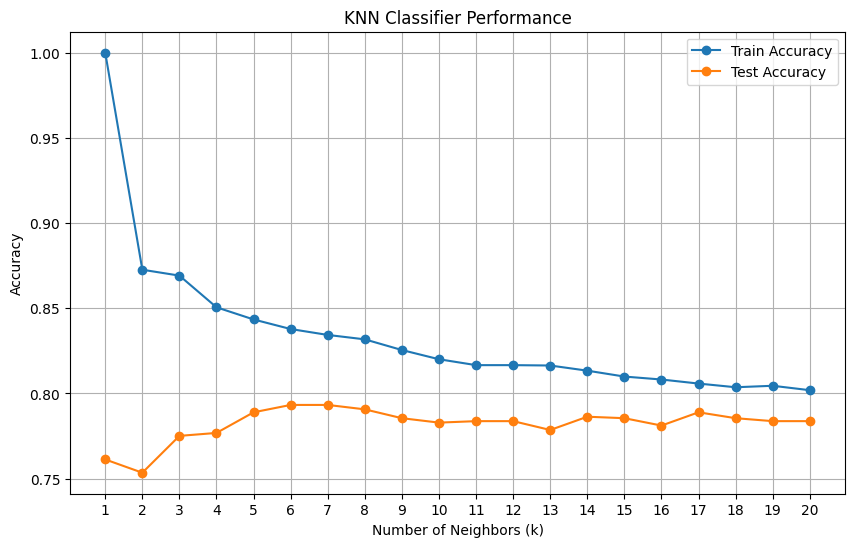

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_values = range(1, 21)

train_scores = []
test_scores = []

# Iterate over each k value
for k in k_values:
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the performance scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label="Train Accuracy", marker="o")
plt.plot(k_values, test_scores, label="Test Accuracy", marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Classifier Performance")
plt.xticks(np.arange(1, 21, step=1))
plt.legend()
plt.grid(True)
plt.show()

k=5 is an optimal value

Find other optimal hyperparameters by using grid search

In [44]:
knn = KNeighborsClassifier()

param_grid = {"weights": ["uniform", "distance"], "p": [1, 2]}

grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy"
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print("Best Parameters:", best_params)
print("Test Accuracy:", test_accuracy)

/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^

Best Parameters: {'p': 2, 'weights': 'distance'}
Test Accuracy: 0.7993079584775087


/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1052: UserWarning: One or more of the test scores are non-finite: [       nan 0.58348075 0.77465707 0.78136118]
  warnings.warn(


Lastly, run the model with optimal hyperparameters

In [45]:
import time

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k, weights="distance")
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Total Runtime:", total_runtime)

Accuracy: 0.7993079584775087
Total Runtime: 0.09849786758422852
